In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%config InlineBackend.figure_format = 'retina'

In [2]:
p = np.polynomial.Polynomial(np.random.choice([-1.,1.,1.j,-1.j],30))
dp = p.deriv()
ddp = dp.deriv()
roots = p.roots()

def halley_method(z):
    return z-p(z)/(dp(z) - ddp(z)*p(z)/(2*dp(z))), z

In [3]:
xmin, xmax, ymin, ymax, xn, yn = -1,1,-1,1,2000,2000
X = np.linspace(xmin, xmax, xn, dtype=np.float64)
Y = np.linspace(ymin, ymax, yn, dtype=np.float64)
eps = 0.00001
max_iter = 100

In [4]:
Z =  X + Y[:,None]*1j
N = np.zeros(Z.shape, dtype=int)

for n in range(max_iter):
    Z, Z_old=halley_method(Z)
    N[np.abs(Z-Z_old)**2>eps] += 1

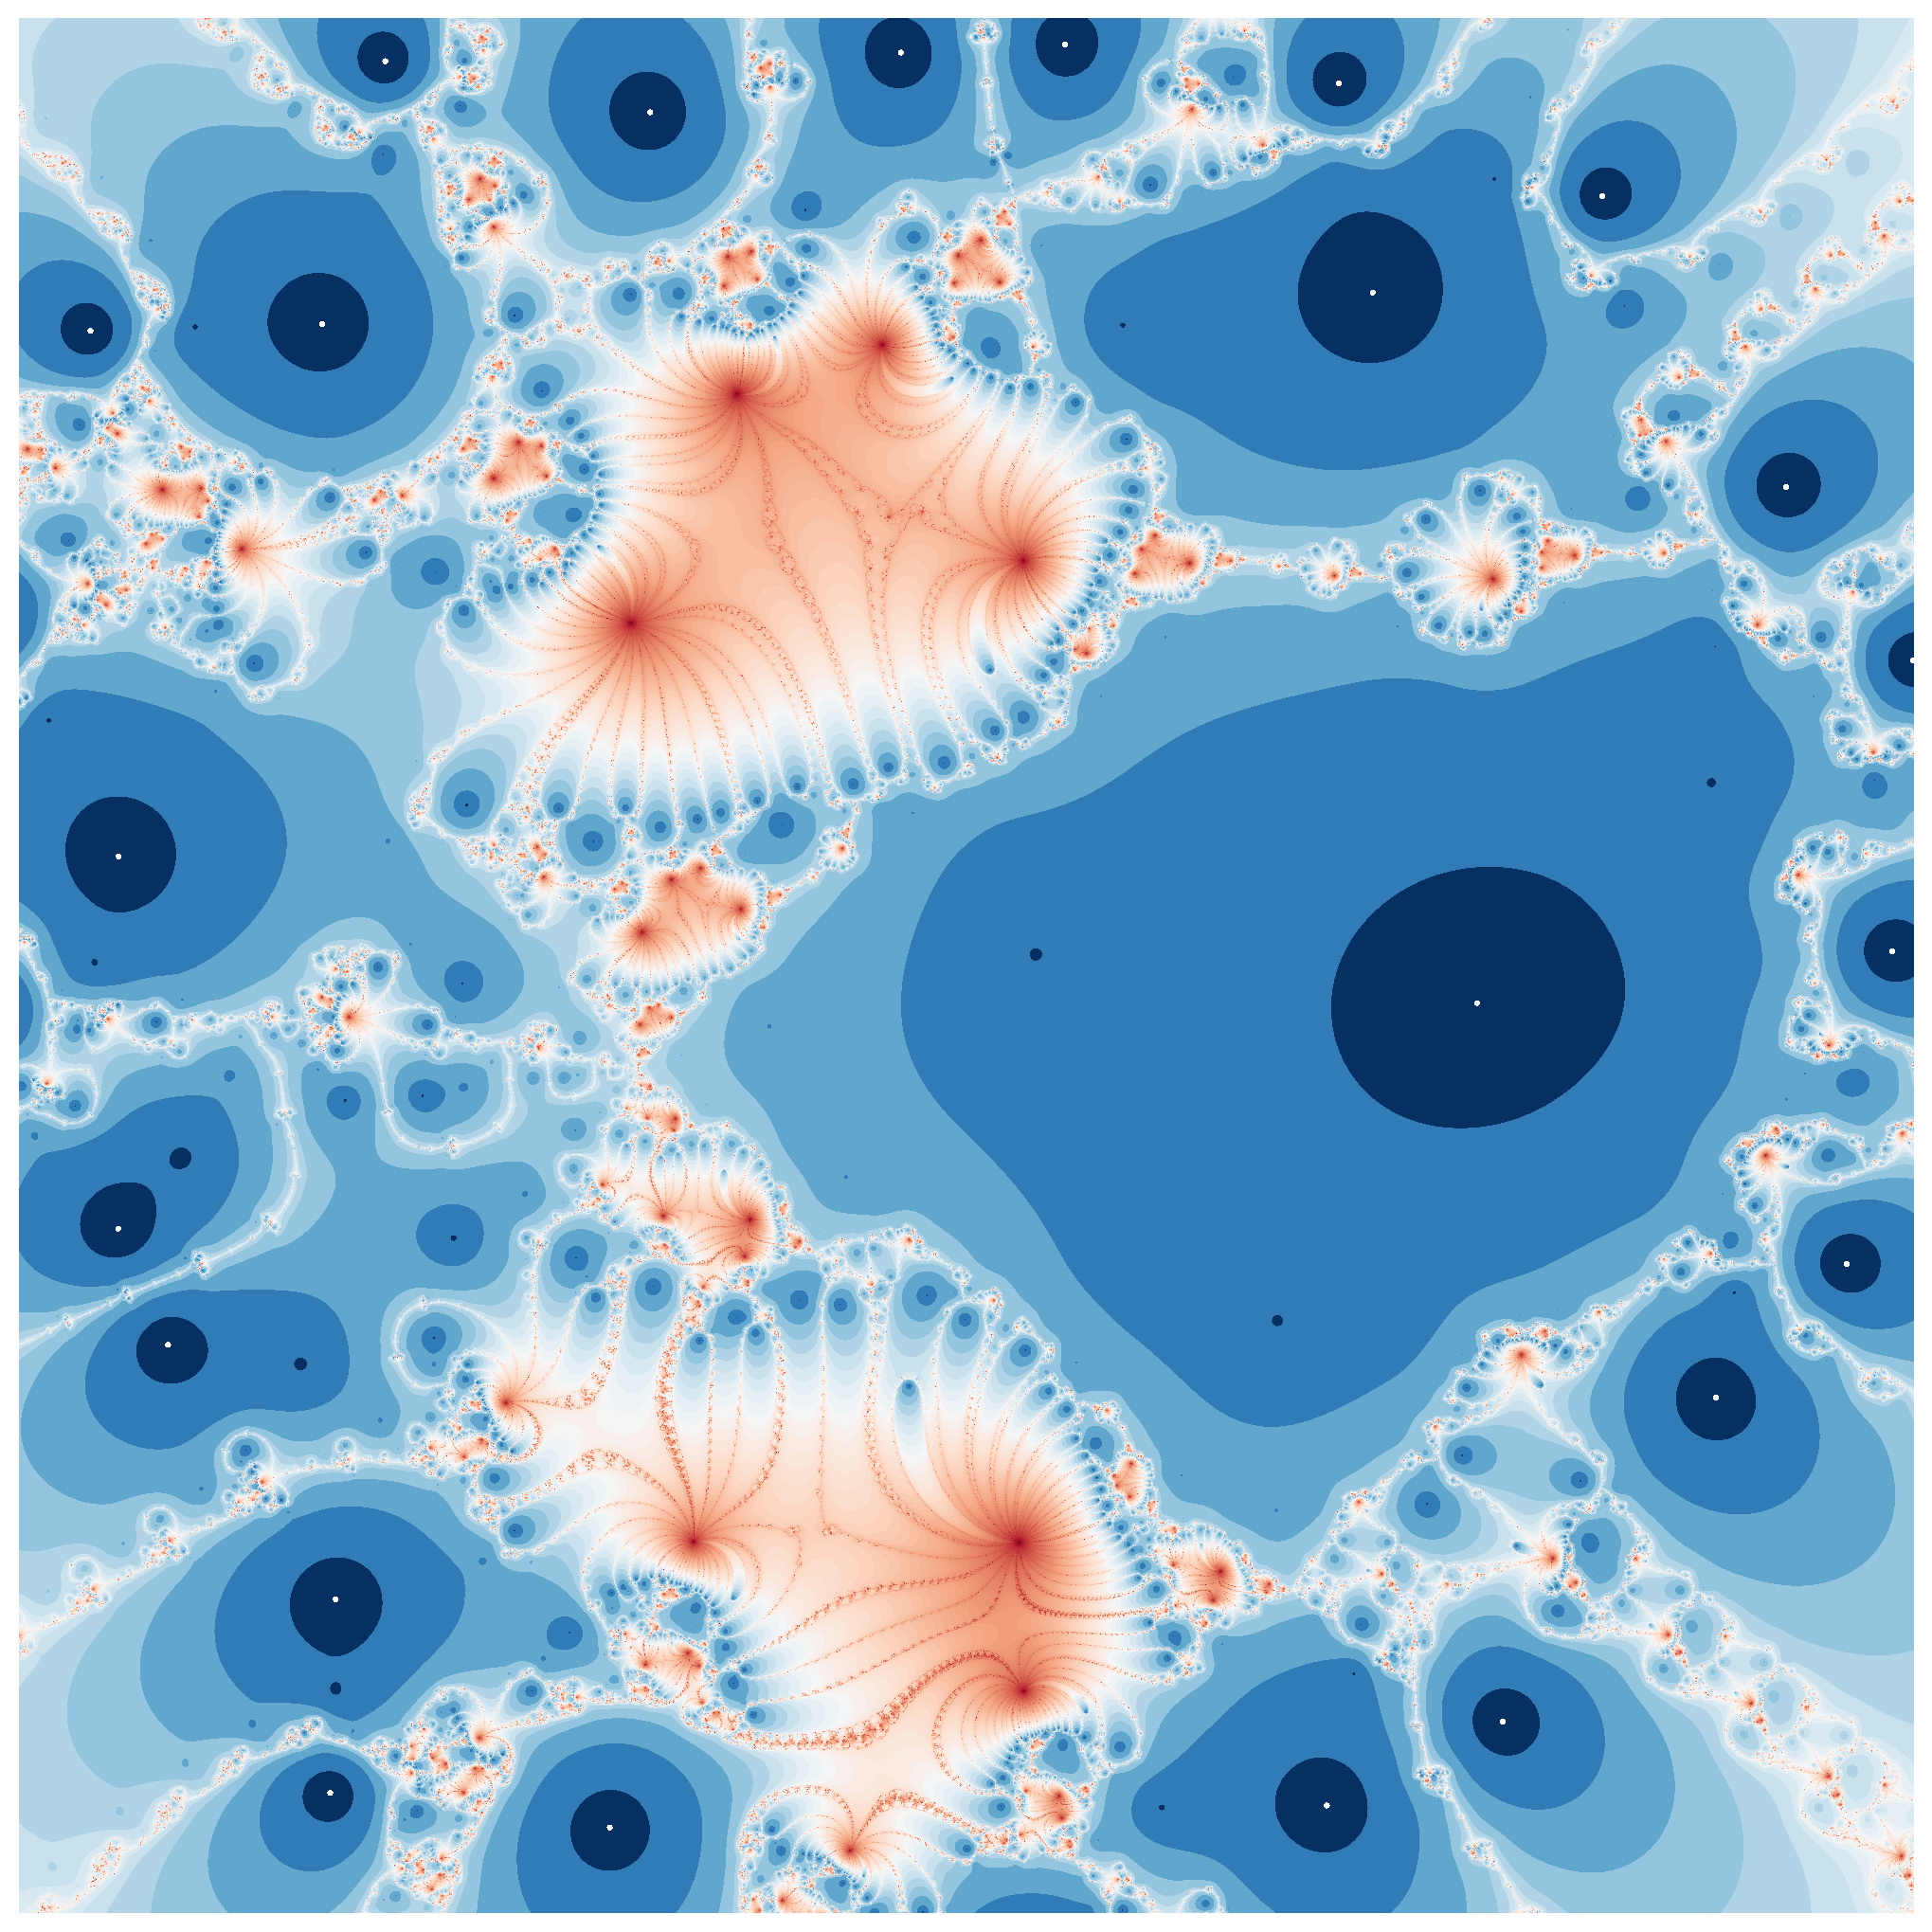

In [7]:
fig,ax= plt.subplots(figsize=(10,10))
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)
for spine in ['top', 'right','left','bottom']:
    ax.spines[spine].set_visible(False)
ax.imshow(N,norm=colors.LogNorm(vmin=1, vmax=np.max(N)),cmap="RdBu_r", interpolation='spline36', 
          interpolation_stage="rgba")
ax.axis("off")
plt.show()